In [15]:
from qiskit import QuantumCircuit
import numpy as np

In [16]:
# Un conjunto de datos de ejemplo con dos clases (0 y 1)
X = np.array([
    [0.1, 0.2],
    [0.5, 0.8],
    [0.9, 0.7],
    [0.4, 0.3]
])

# Las etiquetas correspondientes a cada clase
y = np.array([0, 1, 1, 0])

In [17]:
from qiskit.circuit import Parameter

#circuito con dos qbits
qc = QuantumCircuit(2)

# La compuerta de rotacion ry, que sera el parametro que el modelo aprenda
theta = Parameter('theta')

qc.ry(theta, 0)
qc.ry(theta, 0)

# Imprimimos el circuito
print(qc)

     ┌───────────┐┌───────────┐
q_0: ┤ Ry(theta) ├┤ Ry(theta) ├
     └───────────┘└───────────┘
q_1: ──────────────────────────
                               


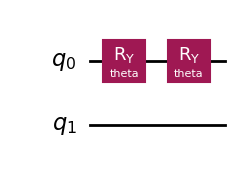

In [18]:
qc.draw(output='mpl')

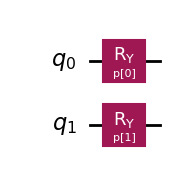

In [19]:
from qiskit.circuit import ParameterVector

# Creamos el circuito
qc = QuantumCircuit(2)

# Un vector de parametros con 2 variables, una para cada caracteristica de los datos
params = ParameterVector('p', 2)

# Aplicamos cada parametro a una compuerta Ry en su respectivo qubit
qc.ry(params[0], 0)
qc.ry(params[1], 1)

#Y lo visualizamos nuevamente
qc.draw(output='mpl')

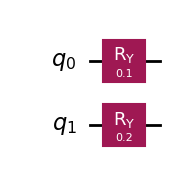

In [20]:
# Enlazar los datos reales

# Tomamos el primer punto de nuestro se de datos
data_point = X[0]

# Enlazamos los valores de nuestros datos a los parametros del circuito
bound_qc = qc.assign_parameters({params: data_point})

# Visualizamos el circuito con los valores ya "cargados"
bound_qc.draw(output='mpl')

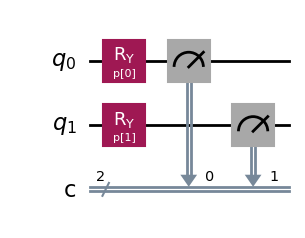

In [21]:
# Creamos un circuito con 2 qubits y 2 bits clásicos
qc = QuantumCircuit(2, 2)

# El resto del circuito se mantiene igual
params = ParameterVector('p', 2)

# Aplicamos los parámetros a las compuertas
qc.ry(params[0], 0)
qc.ry(params[1], 1)

# Medimos el estado de los qubits y lo guardamos en los bits clásicos
qc.measure([0, 1], [0, 1])

# Ahora, visualicemos el circuito completo
qc.draw(output='mpl')

In [23]:
from qiskit.providers.aer import Aer

# 1. Obtener el simulador
simulator = Aer.get_backend('qasm_simulator')

# 2. Correr el circuito en el simulador
# Recuerda que ya enlazamos los datos en bound_qc en el paso anterior
result = simulator.run(bound_qc, shots=1024).result()

# 3. Obtener los resultados de las mediciones
counts = result.get_counts(bound_qc)

print("\nConteo de mediciones:")
print(counts)

ModuleNotFoundError: No module named 'qiskit.providers.aer'